In [13]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel, linear_kernel, cosine_similarity

In [14]:
# Data of different streams 
data1 = pd.read_csv('Engineering books data/agri_data.csv')
data2 = pd.read_csv('Engineering books data/bio_data.csv')
data3 = pd.read_csv('Engineering books data/civil_data.csv')
data4 = pd.read_csv('Engineering books data/cse_data.csv')
data5 = pd.read_csv('Engineering books data/ec_data.csv')
data6 = pd.read_csv('Engineering books data/eee_data.csv')
data7 = pd.read_csv('Engineering books data/it_data.csv')
data8 = pd.read_csv('Engineering books data/mech_data.csv')
data9 = pd.read_csv('Engineering books data/robotic_data.csv')
data10 = pd.read_csv('Engineering books data/additional_data.csv')

In [15]:
# combining every data to a single data
df = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]
data = pd.concat(df)
data = data.reset_index(drop=True)

In [16]:
data.shape

(2375, 10)

In [17]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file
0,"Soil Mechanics of Earthworks, Foundations and ...",NaN,https://covers.zlibcdn2.com/covers100/books/01...,\n This is the third volume...,https://1lib.in/dl/2279969/9cd462,354,Elsevier Science,1988,english,"PDF, 9.35 MB"
1,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB"
2,Practical Problems in Soil Mechanics and Found...,Sheng Y. Peng,https://covers.zlibcdn2.com/covers100/books/7d...,Unknown,https://1lib.in/dl/2800423/3ccf77,346,Elsevier Science Ltd,1985,english,"PDF, 9.86 MB"
3,Underwater Embankments on Soft Soil A Case His...,William F. van Impe,https://covers.zlibcdn2.com/covers100/books/2b...,Unknown,https://1lib.in/dl/981008/e79e1d,154,Unknown,2007,english,"PDF, 3.35 MB"
4,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420,Unknown,2007,english,"PDF, 10.67 MB"


In [18]:
# Droping the data having NaN values 
data = data.dropna()
data = data.reset_index(drop=True)

In [19]:
data.isnull().sum()

title            0
author           0
image            0
desc             0
download_link    0
pages            0
publisher        0
year             0
language         0
file             0
dtype: int64

In [20]:
# Droping the data whose description in NaN
data = data[data['desc'] !='Unknown']
data = data.reset_index(drop=True)
data.shape

(1744, 10)

In [21]:
# Droping the data whose download link in NaN
data = data[data['download_link'] != 'Unknown']
data = data.reset_index(drop=True)
data.shape

(1736, 10)

In [22]:
unknown_author = data[data['author'] == 'Unknown']
unknown_desc = data[data['desc'] == 'Unknown']
unknown_download_link = data[data['download_link'] == 'Unknown']
unknown_pages = data[data['pages'] == 'Unknown']
unknown_publisher = data[data['publisher'] == 'Unknown']
unknown_year = data[data['year'] == 'Unknown']
unknown_language = data[data['language'] == 'Unknown']
unknown_file = data[data['file'] == 'Unknown']
unknown_img = data[data['image'] == 'Unknown']

In [23]:
# Checking wheather there are any other important missing values 
print('unknown authors:', len(unknown_author))
print('unknown desc:',len(unknown_desc))
print('unknown download link:', len(unknown_download_link))
print('unknown pages:', len(unknown_pages))
print('unknown publisher:', len(unknown_publisher))
print('unknown year:', len(unknown_year))
print('unknown language:', len(unknown_language))
print('unknown file:', len(unknown_file))
print('unknown image:', len(unknown_img))

unknown authors: 0
unknown desc: 0
unknown download link: 0
unknown pages: 205
unknown publisher: 134
unknown year: 46
unknown language: 2
unknown file: 0
unknown image: 0


In [24]:
# changing to lower case inorder to droping duplicate title 
data['lower title'] = data['title'].str.lower()
data = data.drop_duplicates(subset=['lower title'])
data = data.reset_index(drop=True)
data.shape

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...
1,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420,Unknown,2007,english,"PDF, 10.67 MB",eco- and ground bio-engineering: the use of ve...
2,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...
3,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...
4,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics


In [26]:
# Getting the length of the title
data['title length'] = data.title.apply(len)

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144
1,Eco- and Ground Bio-Engineering: The Use of Ve...,Alexia Stokes,https://covers.zlibcdn2.com/covers100/books/d2...,\n This volume brings toget...,https://1lib.in/dl/901430/e57c96,420,Unknown,2007,english,"PDF, 10.67 MB",eco- and ground bio-engineering: the use of ve...,197
2,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132
3,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142
4,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28


C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='title length', ylabel='Density'>

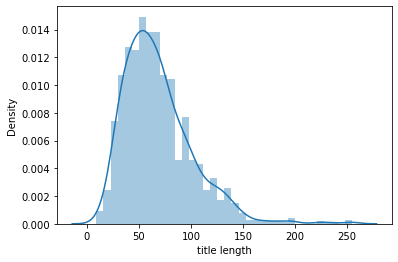

In [27]:
# distribution of length of the title
sns.distplot(data['title length'])

In [28]:
# Removing some Outliers(title length which are more the 180 char)
data = data[data['title length'] < 180]
data = data.reset_index(drop=True)

C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='title length', ylabel='Density'>

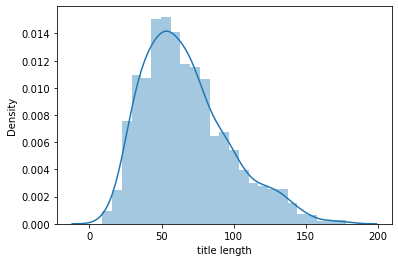

In [29]:
# Distribution after removing outliers
sns.distplot(data['title length'])

In [30]:
data.shape

(1447, 12)

In [31]:
#Large image for front-end
data['large image'] = data['image']
for i in range(data.shape[0]):
    data['large image'][i] = data['large image'][i].replace('covers100', 'covers300')

<ipython-input-31-e4ec371ce4b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['large image'][i] = data['large image'][i].replace('covers100', 'covers300')


In [33]:
#Medium size image for front-end
data['medium image'] = data['image']
for i in range(data.shape[0]):
    data['medium image'][i] = data['medium image'][i].replace('covers100', 'covers200')

<ipython-input-33-b8bf503f35ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['medium image'][i] = data['medium image'][i].replace('covers100', 'covers200')


In [34]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,large image,medium image
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,https://covers.zlibcdn2.com/covers300/books/1b...,https://covers.zlibcdn2.com/covers200/books/1b...
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,https://covers.zlibcdn2.com/covers300/books/2a...,https://covers.zlibcdn2.com/covers200/books/2a...
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,https://covers.zlibcdn2.com/covers300/books/3e...,https://covers.zlibcdn2.com/covers200/books/3e...
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,https://covers.zlibcdn2.com/covers300/books/29...,https://covers.zlibcdn2.com/covers200/books/29...
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,https://covers.zlibcdn2.com/covers300/books/6a...,https://covers.zlibcdn2.com/covers200/books/6a...


In [35]:
# Description length
data['desc_length'] = data.desc.apply(len)

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,large image,medium image,desc_length
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,https://covers.zlibcdn2.com/covers300/books/1b...,https://covers.zlibcdn2.com/covers200/books/1b...,1336
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,https://covers.zlibcdn2.com/covers300/books/2a...,https://covers.zlibcdn2.com/covers200/books/2a...,352
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,https://covers.zlibcdn2.com/covers300/books/3e...,https://covers.zlibcdn2.com/covers200/books/3e...,1088
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,https://covers.zlibcdn2.com/covers300/books/29...,https://covers.zlibcdn2.com/covers200/books/29...,1018
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,https://covers.zlibcdn2.com/covers300/books/6a...,https://covers.zlibcdn2.com/covers200/books/6a...,1195


C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


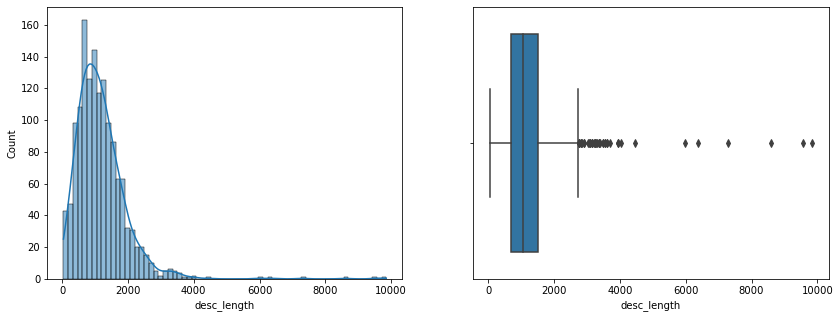

In [36]:
#Distribution and boxplot for description length
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data.desc_length, kde=True)

plt.subplot(1,2,2)
sns.boxplot(data.desc_length)
plt.show()

C:\Users\ELCOT\Anaconda3\envs\finalproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


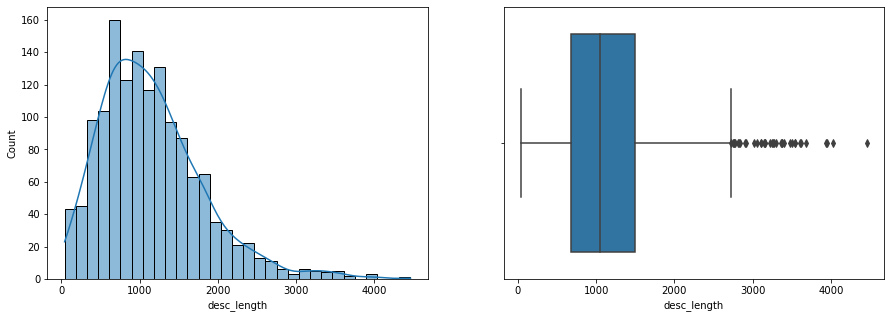

In [37]:
# removing records whose desc length is more the 5000
data = data[data['desc_length']<5000]
data = data.reset_index(drop=True)

# ploting Distribution and boxplot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data.desc_length, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data.desc_length)
plt.show()

In [38]:
# cleaning description 
data['clean desc'] = ''
for i in range(data.shape[0]):
    splited = data['desc'][i].split()
    clean_data = ' '.join(splited)
    data['clean desc'][i] = clean_data

<ipython-input-38-059d7cc10320>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean desc'][i] = clean_data


In [39]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,large image,medium image,desc_length,clean desc
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,https://covers.zlibcdn2.com/covers300/books/1b...,https://covers.zlibcdn2.com/covers200/books/1b...,1336,Residual soils are found in many parts of the ...
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,https://covers.zlibcdn2.com/covers300/books/2a...,https://covers.zlibcdn2.com/covers200/books/2a...,352,In recent years the International Society for ...
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,https://covers.zlibcdn2.com/covers300/books/3e...,https://covers.zlibcdn2.com/covers200/books/3e...,1088,This textbook provides an overview of transpor...
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,https://covers.zlibcdn2.com/covers300/books/29...,https://covers.zlibcdn2.com/covers200/books/29...,1018,"In this introductory textbook, thermodynamics ..."
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,https://covers.zlibcdn2.com/covers300/books/6a...,https://covers.zlibcdn2.com/covers200/books/6a...,1195,"Thermodynamics, An Engineering Approach, eight..."


In [40]:
# Creating new columns for recommendation using desc and title
data['recommend char'] = data['title'].str.lower() +' '+ data['clean desc'].str.lower()
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,large image,medium image,desc_length,clean desc,recommend char
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,https://covers.zlibcdn2.com/covers300/books/1b...,https://covers.zlibcdn2.com/covers200/books/1b...,1336,Residual soils are found in many parts of the ...,foundation engineering: design and constructio...
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,https://covers.zlibcdn2.com/covers300/books/2a...,https://covers.zlibcdn2.com/covers200/books/2a...,352,In recent years the International Society for ...,education and training in geo-engineering scie...
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,https://covers.zlibcdn2.com/covers300/books/3e...,https://covers.zlibcdn2.com/covers200/books/3e...,1088,This textbook provides an overview of transpor...,soil and water contamination: from molecular t...
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,https://covers.zlibcdn2.com/covers300/books/29...,https://covers.zlibcdn2.com/covers200/books/29...,1018,"In this introductory textbook, thermodynamics ...",principles of thermodynamics in this introduct...
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,https://covers.zlibcdn2.com/covers300/books/6a...,https://covers.zlibcdn2.com/covers200/books/6a...,1195,"Thermodynamics, An Engineering Approach, eight...",thermodynamics: an engineering approach 8th ed...


In [41]:
data['recommend char'][1]

'education and training in geo-engineering sciences: soil mechanics and geotechnical engineering, engineering geology, rock mechanics in recent years the international society for soil mechanics and geotechnical engineering (issmge), the international association for engineering geology and environment (iaeg), and the international society for rock mechanics (isrm) have concluded a cooperation agreement, leading to the foundation of the federation of international geo-engineering'

In [42]:
#importing libraries for cleaning texts in datasets
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
#some stopwords are added...to get better results
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "youre", "youve", "youll", "youd", 
                'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
                'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
                'who', 'whom', 'this', 'that', "thatll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
                'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
                'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
                'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 
                'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
                'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
                'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "dont", 'should', 
                "shouldve", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "arent", 'couldn', "couldnt", 
                'didn', "didnt", 'doesn', "doesnt", 'hadn', "hadnt", 'hasn', "hasnt", 'haven', "havent", 'isn', "isnt", 
                'ma', 'mightn', "mightnt", 'mustn', "mustnt", 'needn', "neednt", 'shan', "shant", 'shouldn', "shouldnt", 
                'wasn', "wasnt", 'weren', "werent", 'won', "wont", 'wouldn', "wouldnt",'book','many','also','may','part','chapter',
                'use','edition','course','first','second','third','fourth','fifth','sixth','seventh','every','textbook','using',
                'two','much','way','useful','provide','include','ha','including','one','page','used','today','take','based']


In [44]:
def cleaning(message):
    text = [char for char in message if char not in string.punctuation] #removing punctuation
    text = ''.join(text)
    text = [lemmatizer.lemmatize(word) for word in text.split()]  #using lemmatization
    text = ' '.join(text)
    text = [word for word in text.split() if word.lower() not in my_stopwords]   #removing stopwords
    text = ' '.join(text)
    return text

In [45]:
# cleaning by removing punctuation, stopwords and lemmatization
data['recommend char'] = data['recommend char'].apply(cleaning)
data['recommend char'][0]

'foundation engineering design construction tropical soil balkema proceeding monograph engineering water earth science residual soil found world like soil extensively construction built upon construction material residual soil formed process rock weathering proceed faster rate transport process water gravity wind whereby resulting soil remain place soil typically retains characteristic parent rock tropical region residual soil layer thick sometimes extending hundred meter reaching unweathered rock gathered stateoftheart knowledge number experienced expert working foundation engineering tropical residual soil subject covered geology formation residual soil site investigation characterization selection parameter foundation design design shallow deep foundation driven pile drilled shaft caisson special topic design pile marginallystable river bank micro pile augeo pile pile load ndt foundation failure remedial work pile supported embankment includes country case study engineering geology 

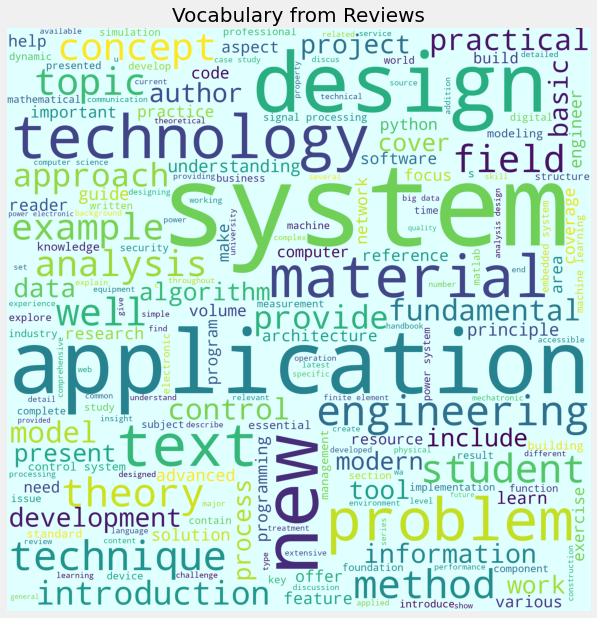

In [46]:
#most frequently present words in recommend char
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate(' '.join(list(data['recommend char'])))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Descriptions", fontsize = 20)
plt.show()

In [47]:
data['recommend char2'] = data['lower title'].apply(cleaning)

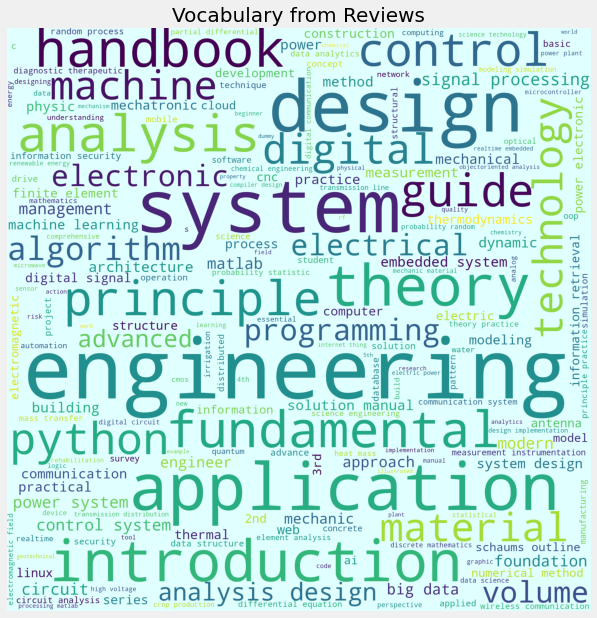

In [48]:
#most frequent present words in recommend char2

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate(' '.join(list(data['recommend char2'])))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Title", fontsize = 20)
plt.show()

In [49]:
data.head()

,title,author,image,desc,download_link,pages,publisher,year,language,file,lower title,title length,large image,medium image,desc_length,clean desc,recommend char,recommend char2
0,Foundation Engineering: Design and Constructio...,B.B.K. Huat,https://covers.zlibcdn2.com/covers100/books/1b...,\n Residual soils are found...,https://1lib.in/dl/1247565/f9e712,256,Taylor & Francis,2006,english,"PDF, 86.52 MB",foundation engineering: design and constructio...,144,https://covers.zlibcdn2.com/covers300/books/1b...,https://covers.zlibcdn2.com/covers200/books/1b...,1336,Residual soils are found in many parts of the ...,foundation engineering design construction tro...,foundation engineering design construction tro...
1,Education and Training in Geo-Engineering Scie...,Iacint Manoliu (Editor),https://covers.zlibcdn2.com/covers100/books/2a...,\nIn recent years the International Society fo...,https://1lib.in/dl/5982938/e28e87,Unknown,CRC Press,2008,Unknown,"PDF, 375.03 MB",education and training in geo-engineering scie...,132,https://covers.zlibcdn2.com/covers300/books/2a...,https://covers.zlibcdn2.com/covers200/books/2a...,352,In recent years the International Society for ...,education training geoengineering science soil...,education training geoengineering science soil...
2,Soil and Water Contamination: From molecular t...,Marcel van der Perk,https://covers.zlibcdn2.com/covers100/books/3e...,\n This textbook provides a...,https://1lib.in/dl/966945/b3831a,404,Unknown,2006,english,"PDF, 5.78 MB",soil and water contamination: from molecular t...,142,https://covers.zlibcdn2.com/covers300/books/3e...,https://covers.zlibcdn2.com/covers200/books/3e...,1088,This textbook provides an overview of transpor...,soil water contamination molecular catchment s...,soil water contamination molecular catchment s...
3,Principles of Thermodynamics,Jean-Philippe Ansermet,https://covers.zlibcdn2.com/covers100/books/29...,\n In this introductory tex...,https://1lib.in/dl/3685253/9f5b4e,529,Cambridge University Press,2019,english,"PDF, 11.50 MB",principles of thermodynamics,28,https://covers.zlibcdn2.com/covers300/books/29...,https://covers.zlibcdn2.com/covers200/books/29...,1018,"In this introductory textbook, thermodynamics ...",principle thermodynamics introductory thermody...,principle thermodynamics
4,Thermodynamics: An Engineering Approach 8th Ed...,Yunus A. Çengel,https://covers.zlibcdn2.com/covers100/books/6a...,"\nThermodynamics, An Engineering Approach, eig...",https://1lib.in/dl/2577672/7b237e,1115,McGraw-Hill Education,2014,english,"PDF, 64.77 MB",thermodynamics: an engineering approach 8th ed...,51,https://covers.zlibcdn2.com/covers300/books/6a...,https://covers.zlibcdn2.com/covers200/books/6a...,1195,"Thermodynamics, An Engineering Approach, eight...",thermodynamics engineering approach 8th thermo...,thermodynamics engineering approach 8th


In [211]:
data.to_csv('engineering_data.csv', index=False)